In [98]:
import pickle

# with open(r'C:\Users\IT\Documents\UCL\pyssem\scenario-properties-not-elliptical.pkl', 'rb') as f:
#     baseline = pickle.load(f)

# with open(r'C:\Users\IT\Documents\UCL\pyssem\figures\elliptical-new\scenario-properties-elliptical.pkl', 'rb') as f:
#     elliptical = pickle.load(f)

with open(r'C:\Users\IT\Documents\UCL\pyssem\scenario-properties-frag-spread.pkl', 'rb') as f:
    frag_spread = pickle.load(f)

In [1]:
elliptical.species_names

NameError: name 'elliptical' is not defined

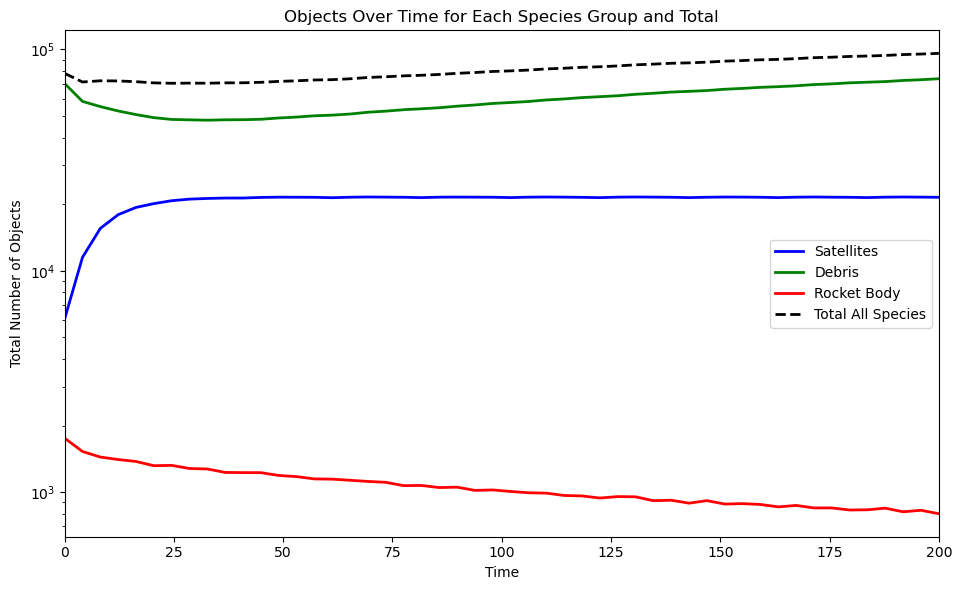

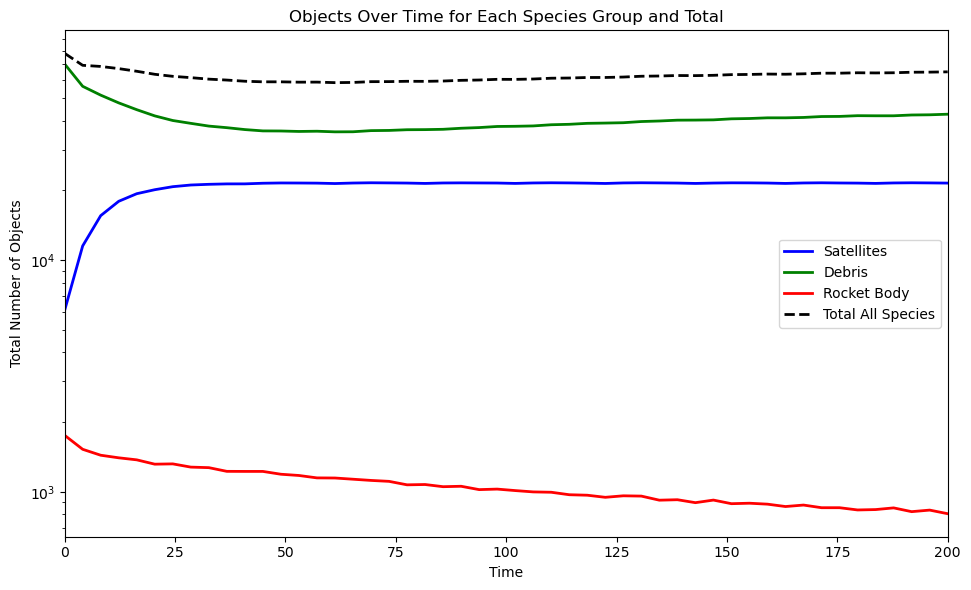

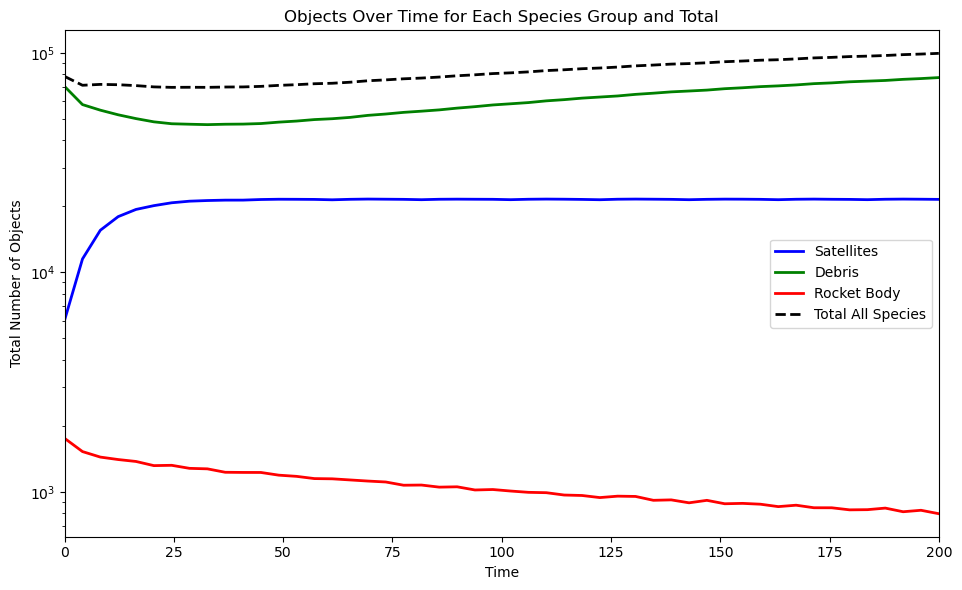

In [100]:
import numpy as np
import matplotlib.pyplot as plt

def all_species(scenario_properties):
    # Splitting by sub-group
    output = scenario_properties.output  # Output object from simulation
    n_species = scenario_properties.species_length  # Number of species
    num_shells = scenario_properties.n_shells  # Number of shells per species
    species_names = scenario_properties.species_names  # List of species names
    plt.figure(figsize=(10, 6))

    total_objects_all_species = np.zeros_like(output.t)

    # Initialize arrays for different species groups
    total_objects_S_group = np.zeros_like(output.t)
    total_objects_N_group = np.zeros_like(output.t)
    total_objects_B_group = np.zeros_like(output.t)

    for i in range(n_species):
        start_idx = i * num_shells
        end_idx = start_idx + num_shells
        total_objects_per_species = np.sum(output.y[start_idx:end_idx, :], axis=0)

        # Check species group by name and sum accordingly
        species_name = species_names[i]
        
        if species_name.startswith('S'):
            total_objects_S_group += total_objects_per_species
        elif species_name.startswith('N'):
            total_objects_N_group += total_objects_per_species
        elif species_name.startswith('B'):
            total_objects_B_group += total_objects_per_species
        
        total_objects_all_species += total_objects_per_species

    # Plot each species group in different colors
    plt.plot(output.t, total_objects_S_group, label='Satellites', color='blue', linewidth=2)
    plt.plot(output.t, total_objects_N_group, label='Debris', color='green', linewidth=2)
    plt.plot(output.t, total_objects_B_group, label='Rocket Body', color='red', linewidth=2)

    # Plot the total number of objects for all species combined
    plt.plot(output.t, total_objects_all_species, label='Total All Species', color='k', linewidth=2, linestyle='--')

    # Add labels, title, and legend
    plt.xlabel('Time')
    plt.ylabel('Total Number of Objects')
    plt.title('Objects Over Time for Each Species Group and Total')
    plt.xlim(0, max(output.t))
    plt.legend()
    plt.tight_layout()
    # plt.ylim(0, 1000)
    plt.yscale('log')

    # Save the figure
    plt.show()

all_species(baseline)
all_species(elliptical)
all_species(frag_spread)

## By object count

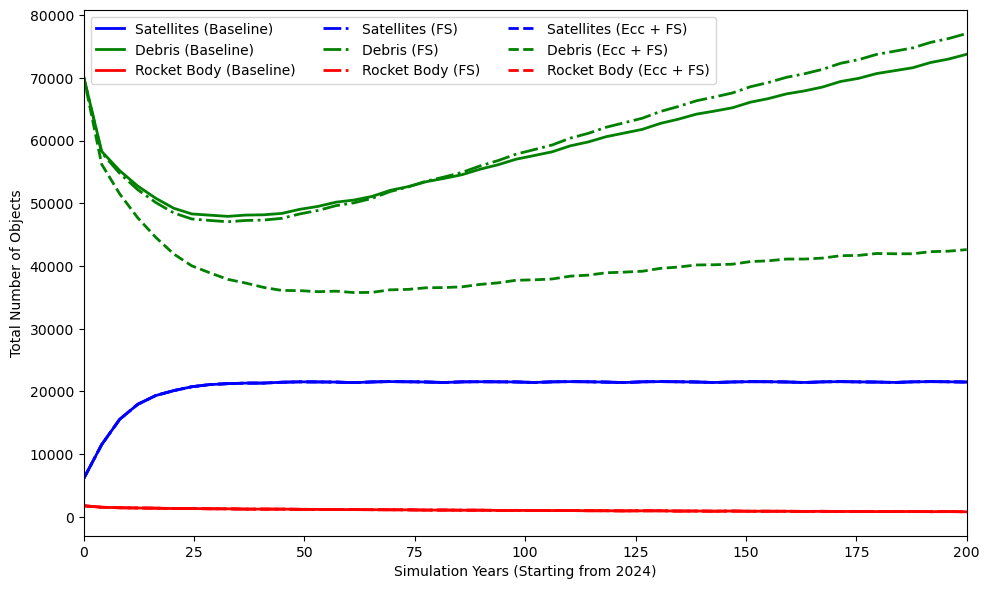

In [106]:
import numpy as np
import matplotlib.pyplot as plt

def all_species_comparison(scenario_properties_baseline, scenario_properties_elliptical, frag_spread):
    def plot_species_group(scenario_properties, linestyle, label_suffix):
        output = scenario_properties.output
        n_species = scenario_properties.species_length
        num_shells = scenario_properties.n_shells
        species_names = scenario_properties.species_names

        total_objects_all_species = np.zeros_like(output.t)

        # Initialize arrays for different species groups
        total_objects_S_group = np.zeros_like(output.t)
        total_objects_N_group = np.zeros_like(output.t)
        total_objects_B_group = np.zeros_like(output.t)

        for i in range(n_species):
            start_idx = i * num_shells
            end_idx = start_idx + num_shells
            total_objects_per_species = np.sum(output.y[start_idx:end_idx, :], axis=0)

            # Check species group by name and sum accordingly
            species_name = species_names[i]

            if species_name.startswith('S'):
                total_objects_S_group += total_objects_per_species
            elif species_name.startswith('N'):
                total_objects_N_group += total_objects_per_species
            elif species_name.startswith('B'):
                total_objects_B_group += total_objects_per_species

            total_objects_all_species += total_objects_per_species

        # Plot each species group with the specified linestyle and label
        plt.plot(output.t, total_objects_S_group, label=f'Satellites {label_suffix}', linestyle=linestyle, linewidth=2, color='blue')
        plt.plot(output.t, total_objects_N_group, label=f'Debris {label_suffix}', linestyle=linestyle, linewidth=2, color='green')
        plt.plot(output.t, total_objects_B_group, label=f'Rocket Body {label_suffix}', linestyle=linestyle, linewidth=2, color='red')

        # Plot the total number of objects for all species combined
        # plt.plot(output.t, total_objects_all_species, label=f'Total All Species {label_suffix}', linestyle=linestyle, linewidth=2, color='k')

    # Plot both baseline (solid) and elliptical (dashed)
    plt.figure(figsize=(10, 6))

    plot_species_group(scenario_properties_baseline, linestyle='-', label_suffix='(Baseline)')
    plot_species_group(frag_spread, linestyle='-.', label_suffix='(FS)')
    plot_species_group(scenario_properties_elliptical, linestyle='--', label_suffix='(Ecc + FS)')

    # Add labels, title, and legend
    plt.xlabel('Simulation Years (Starting from 2024)')
    plt.ylabel('Total Number of Objects')
    plt.xlim(0, max(scenario_properties_baseline.output.t))
    # plt.yscale('log')
    plt.legend(ncol=3)
    plt.tight_layout()

    # Show the figure
    plt.show()

# Call the function with both scenarios
all_species_comparison(baseline, elliptical, frag_spread)


## add also fragment spreading
## divide for all of the debris, baseline, fragment and elliptical
# make a random intiial population - to show the efficacy of the model 

## By Object Mass

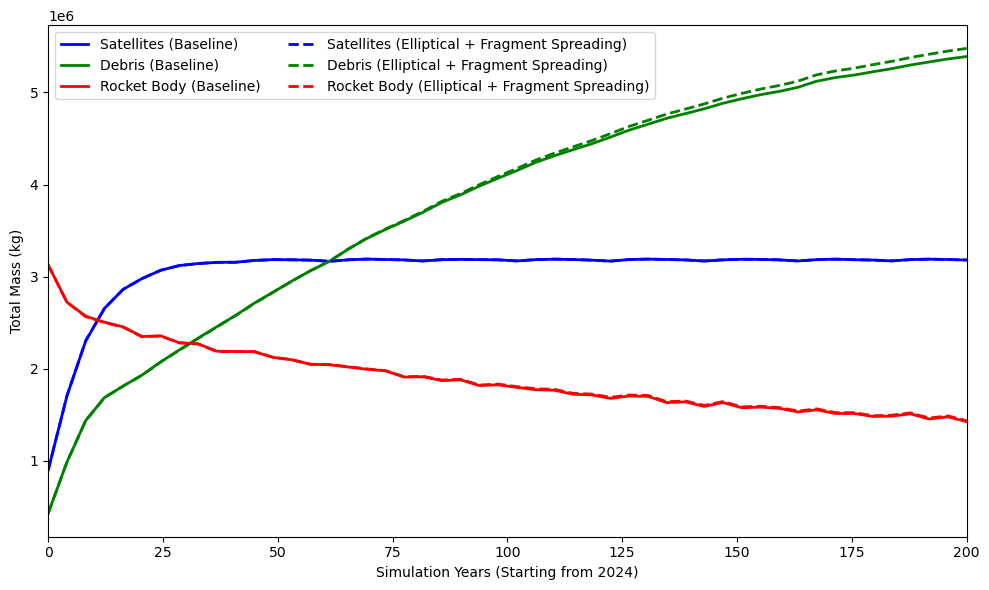

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def all_species_comparison(scenario_properties_baseline, scenario_properties_elliptical):
    def plot_species_group(scenario_properties, linestyle, label_suffix):
        output = scenario_properties.output
        n_species = scenario_properties.species_length
        num_shells = scenario_properties.n_shells
        species_names = scenario_properties.species_names
        species_groups = scenario_properties.species.values()

        total_mass_all_species = np.zeros_like(output.t)

        # Initialize arrays for different species groups' mass
        total_mass_S_group = np.zeros_like(output.t)
        total_mass_N_group = np.zeros_like(output.t)
        total_mass_B_group = np.zeros_like(output.t)

        for i in range(n_species):
            start_idx = i * num_shells
            end_idx = start_idx + num_shells
            total_objects_per_species = np.sum(output.y[start_idx:end_idx, :], axis=0)

            # Retrieve the mass for the current species
            species_name = species_names[i]
            mass = 0
            for species_group in species_groups:
                for species in species_group:
                    if species.sym_name == species_name:
                        mass = species.mass  # Get the mass of the species
                        break

            # Multiply the number of objects by their mass
            total_mass_per_species = total_objects_per_species * mass

            # Categorize by species group and sum the mass accordingly
            if species_name.startswith('S'):
                total_mass_S_group += total_mass_per_species
            elif species_name.startswith('N'):
                total_mass_N_group += total_mass_per_species
            elif species_name.startswith('B'):
                total_mass_B_group += total_mass_per_species

            total_mass_all_species += total_mass_per_species

        # Plot each species group's total mass with the specified linestyle and label
        plt.plot(output.t, total_mass_S_group, label=f'Satellites {label_suffix}', linestyle=linestyle, linewidth=2, color='blue')
        plt.plot(output.t, total_mass_N_group, label=f'Debris {label_suffix}', linestyle=linestyle, linewidth=2, color='green')
        plt.plot(output.t, total_mass_B_group, label=f'Rocket Body {label_suffix}', linestyle=linestyle, linewidth=2, color='red')

    # Plot both baseline (solid) and elliptical (dashed)
    plt.figure(figsize=(10, 6))

    plot_species_group(scenario_properties_baseline, linestyle='-', label_suffix='(Baseline)')
    plot_species_group(scenario_properties_elliptical, linestyle='--', label_suffix='(Elliptical + Fragment Spreading)')

    # Add labels, title, and legend
    plt.xlabel('Simulation Years (Starting from 2024)')
    plt.ylabel('Total Mass (kg)')
    plt.xlim(0, max(scenario_properties_baseline.output.t))
    plt.legend(ncol=2)
    plt.tight_layout()

    # Show the figure
    plt.show()

# Call the function with both scenarios
all_species_comparison(baseline, elliptical)


## Across altitudes

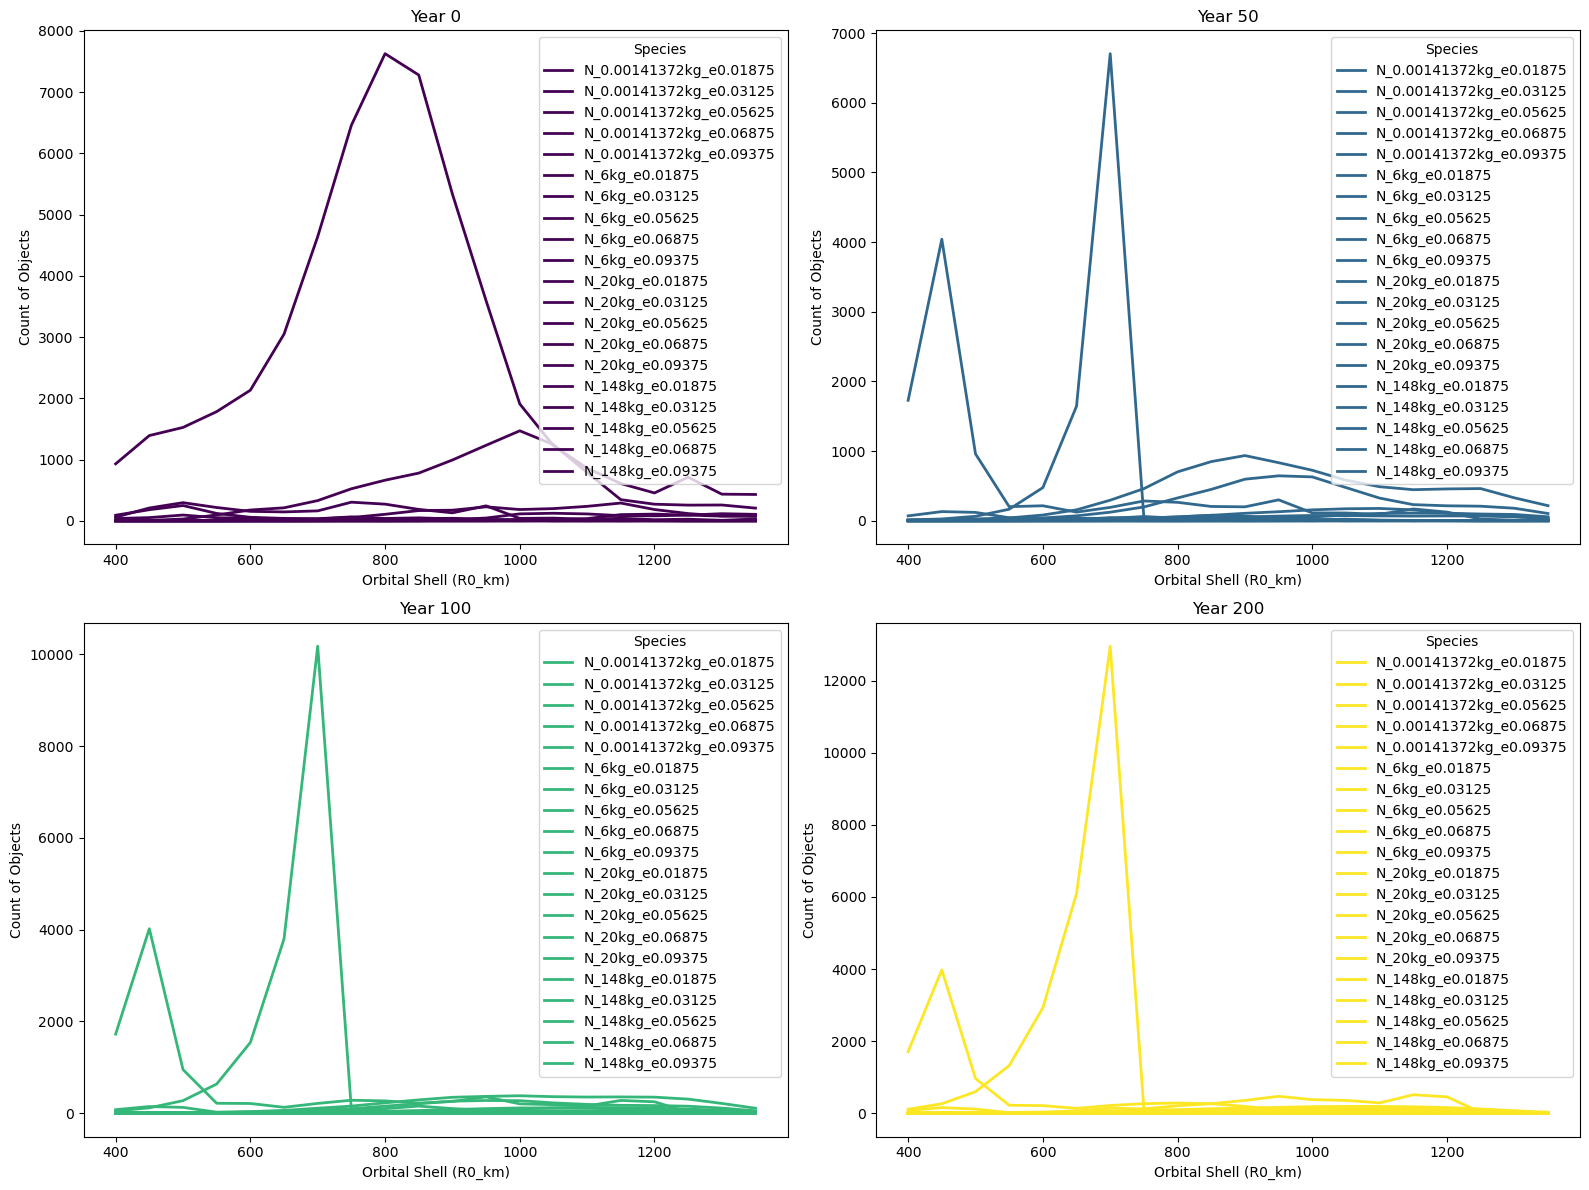

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

def plot_N_species_distribution_grid(scenario_properties):
    output = scenario_properties.output
    n_species = scenario_properties.species_length
    num_shells = scenario_properties.n_shells
    species_names = scenario_properties.species_names

    # Define the timesteps (year 0, 50, 100, 150, 200)
    time_points = [0, 50, 100, 200]

    # Reshape the data to separate species and shells
    n_time_points = len(output.t)
    data_reshaped = output.y.reshape(n_species, num_shells, n_time_points)

    # Extract the unique base species names (part before the underscore)
    base_species_names = [name.split('_')[0] for name in species_names]

    # Get the x-axis labels from scenario_properties.R0_km and slice to match shells_per_species
    orbital_shell_labels = scenario_properties.R0_km[:num_shells]

    # Initialize the 2x2 plot grid
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    axs = axs.flatten()

    # Color map for the years
    year_color_map = plt.cm.viridis(np.linspace(0, 1, len(time_points)))

    # Plot species starting with 'N'
    for plot_idx, t in enumerate(time_points):
        ax = axs[plot_idx]
        
        # Loop over each species starting with 'N'
        for species_index in range(n_species):
            if base_species_names[species_index].startswith('N'):
                # Assign a unique color for this species
                base_color = year_color_map[plot_idx]
                
                # Find the closest index for the specific year
                t_idx = np.argmin(np.abs(output.t - t))
                
                # Plot for the specific year
                ax.plot(orbital_shell_labels, data_reshaped[species_index, :, t_idx], 
                         label=f'{species_names[species_index]}', color=base_color, linewidth=2)

        # Customize the subplot
        ax.set_title(f'Year {t}')
        ax.set_xlabel('Orbital Shell (R0_km)')
        ax.set_ylabel('Count of Objects')
        ax.legend(title='Species', loc='upper right', ncol=1)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the final 2x2 grid plot
    plt.show()

# Call the function
plot_N_species_distribution_grid(elliptical)

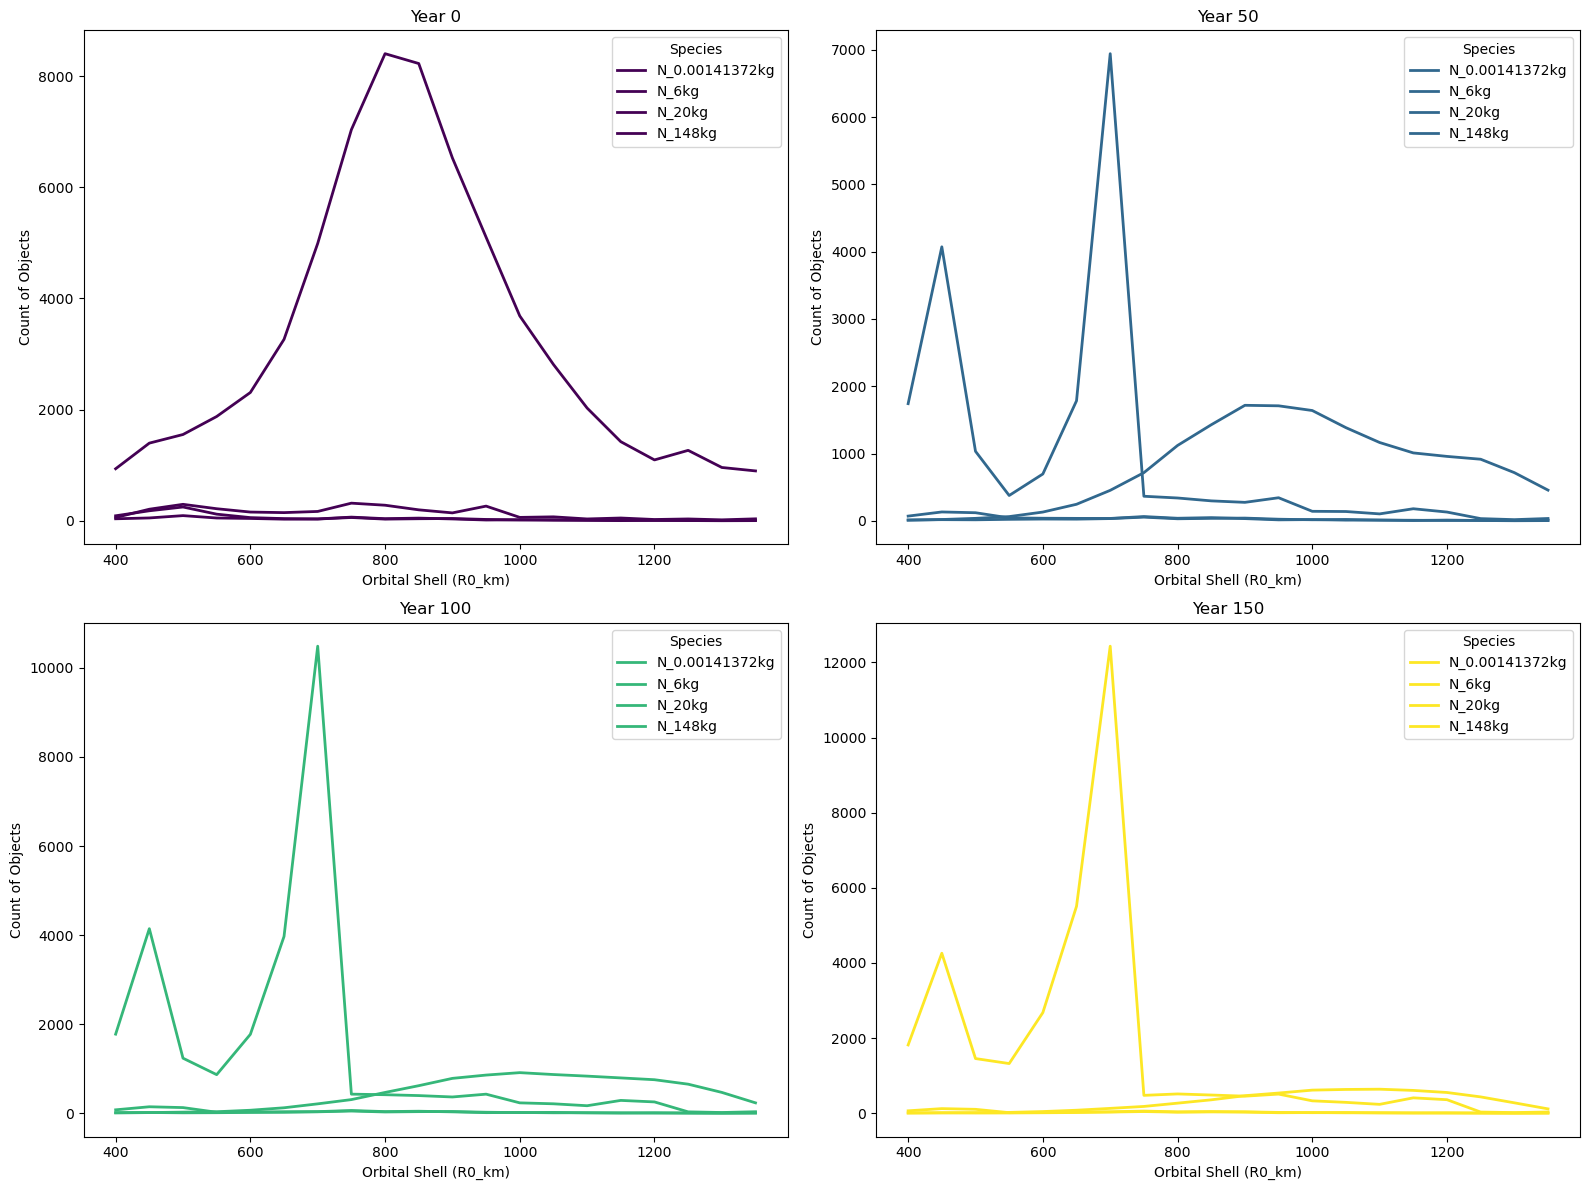

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_N_species_distribution_grid(scenario_properties):
    output = scenario_properties.output
    n_species = scenario_properties.species_length
    num_shells = scenario_properties.n_shells
    species_names = scenario_properties.species_names

    # Define the timesteps (year 0, 50, 100, 150, 200)
    time_points = [0, 50, 100, 150]

    # Reshape the data to separate species and shells
    n_time_points = len(output.t)
    data_reshaped = output.y.reshape(n_species, num_shells, n_time_points)

    # Extract the unique base species names (part before the first underscore)
    base_species_names = [name.split('_')[0] + "_" + name.split('_')[1] for name in species_names]

    # Get the x-axis labels from scenario_properties.R0_km and slice to match shells_per_species
    orbital_shell_labels = scenario_properties.R0_km[:num_shells]

    # Initialize the 2x2 plot grid
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    axs = axs.flatten()

    # Color map for the years
    year_color_map = plt.cm.viridis(np.linspace(0, 1, len(time_points)))

    # Plot species starting with 'N'
    for plot_idx, t in enumerate(time_points):
        ax = axs[plot_idx]
        
        # Initialize a dictionary to accumulate summed data for each base species
        species_data = defaultdict(lambda: np.zeros(num_shells))

        # Loop over each species starting with 'N' and sum subcategories
        for species_index in range(n_species):
            if base_species_names[species_index].startswith('N'):
                base_name = base_species_names[species_index]  # Base name without subcategories
                
                # Find the closest index for the specific year
                t_idx = np.argmin(np.abs(output.t - t))
                
                # Sum the data for species subcategories
                species_data[base_name] += data_reshaped[species_index, :, t_idx]

        # Plot the summed data for each base species
        for base_name, summed_data in species_data.items():
            base_color = year_color_map[plot_idx]  # Use color corresponding to the year
            ax.plot(orbital_shell_labels, summed_data, label=f'{base_name}', color=base_color, linewidth=2)

        # Customize the subplot
        ax.set_title(f'Year {t}')
        ax.set_xlabel('Orbital Shell (R0_km)')
        ax.set_ylabel('Count of Objects')
        ax.legend(title='Species', loc='upper right', ncol=1)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the final 2x2 grid plot
    plt.show()

# Call the function
plot_N_species_distribution_grid(elliptical)

C:\Users\IT\AppData\Local\Temp\ipykernel_79888\106474835.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20')


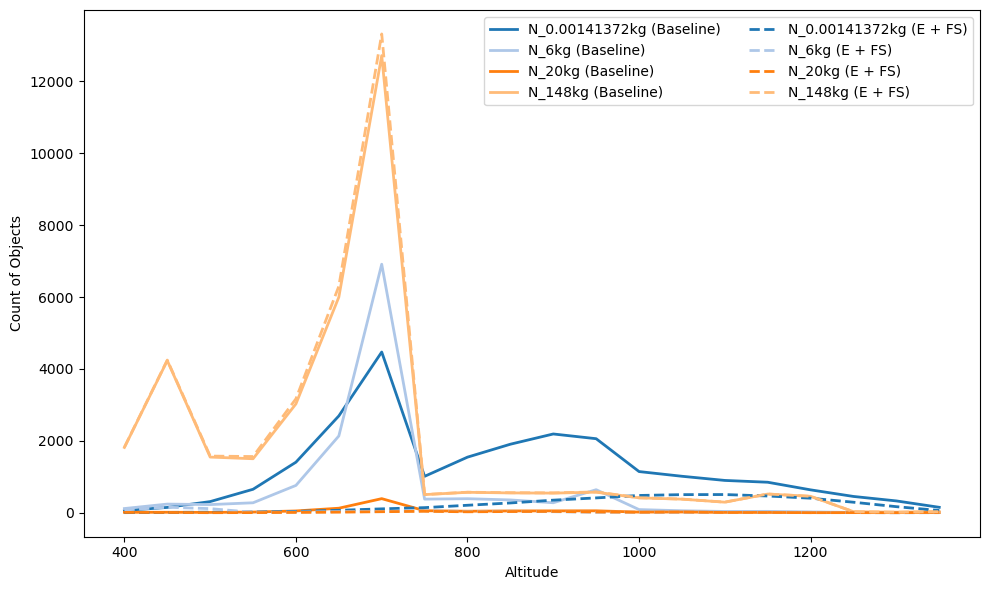

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_final_year_comparison(baseline, elliptical):
    # Define the final year
    final_year = 200

    # Extract the common attributes
    num_shells = baseline.n_shells
    orbital_shell_labels = baseline.R0_km[:num_shells]

    # Prepare the plot
    plt.figure(figsize=(10, 6))

    # Color map for species (for both baseline and elliptical)
    color_map = plt.cm.get_cmap('tab20')

    # Helper function to plot a scenario
    def plot_scenario(scenario_properties, linestyle, label_suffix):
        output = scenario_properties.output
        n_species = scenario_properties.species_length
        species_names = scenario_properties.species_names

        # Extract the base species names (group by name, handling cases without underscores)
        base_species_names = []
        for name in species_names:
            if "_" in name:
                base_species_names.append(name.split('_')[0] + "_" + name.split('_')[1])
            else:
                base_species_names.append(name)  # If no underscore, just use the full name

        # Initialize a dictionary to accumulate summed data for each base species
        species_data = defaultdict(lambda: np.zeros(num_shells))

        # Find the closest index for the final year
        t_idx = np.argmin(np.abs(output.t - final_year))

        # Loop over each species starting with 'N' and sum subcategories
        for species_index in range(n_species):
            if base_species_names[species_index].startswith('N'):
                base_name = base_species_names[species_index]  # Base name without subcategories
                species_data[base_name] += output.y.reshape(n_species, num_shells, -1)[species_index, :, t_idx]

        # Plot the summed data for each base species
        for i, (base_name, summed_data) in enumerate(species_data.items()):
            plt.plot(orbital_shell_labels, summed_data, label=f'{base_name} {label_suffix}', 
                     color=color_map(i), linestyle=linestyle, linewidth=2)

    # Plot baseline (solid lines)
    plot_scenario(baseline, linestyle='-', label_suffix='(Baseline)')

    # Plot elliptical (dashed lines)
    plot_scenario(elliptical, linestyle='--', label_suffix='(E + FS)')

    # Customize the plot
    plt.xlabel('Altitude')
    plt.ylabel('Count of Objects')
    # plt.title('Final Year (200) Distribution of N Species: Baseline vs. Elliptical')
    plt.legend(loc='upper right', ncol=2)
    plt.tight_layout()
    # plt.yscale('log')

    # Show the plot
    plt.show()

# Call the function with both baseline and elliptical
plot_final_year_comparison(baseline, elliptical)

C:\Users\IT\AppData\Local\Temp\ipykernel_79888\3114957158.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20')


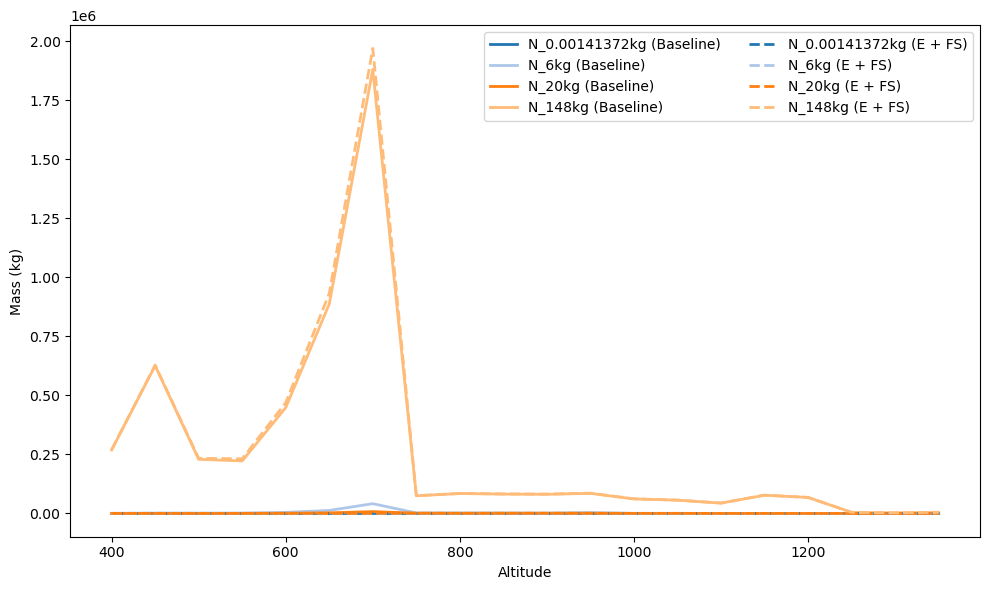

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_final_year_comparison(baseline, elliptical):
    # Define the final year
    final_year = 200

    # Extract the common attributes
    num_shells = baseline.n_shells
    orbital_shell_labels = baseline.R0_km[:num_shells]

    # Prepare the plot
    plt.figure(figsize=(10, 6))

    # Color map for species (for both baseline and elliptical)
    color_map = plt.cm.get_cmap('tab20')

    # Helper function to plot a scenario
    def plot_scenario(scenario_properties, linestyle, label_suffix):
        output = scenario_properties.output
        n_species = scenario_properties.species_length
        species_names = scenario_properties.species_names
        species_groups = scenario_properties.species.values()  # Get species data (to retrieve mass)

        # Extract the base species names (group by name, handling cases without underscores)
        base_species_names = []
        for name in species_names:
            if "_" in name:
                base_species_names.append(name.split('_')[0] + "_" + name.split('_')[1])
            else:
                base_species_names.append(name)  # If no underscore, just use the full name

        # Initialize a dictionary to accumulate summed data (mass) for each base species
        species_mass_data = defaultdict(lambda: np.zeros(num_shells))

        # Find the closest index for the final year
        t_idx = np.argmin(np.abs(output.t - final_year))

        # Loop over each species starting with 'N' and sum subcategories by mass
        for species_index in range(n_species):
            if base_species_names[species_index].startswith('N'):
                base_name = base_species_names[species_index]  # Base name without subcategories
                
                # Retrieve the mass for the current species
                mass = 0
                for species_group in species_groups:
                    for species in species_group:
                        if species.sym_name == species_names[species_index]:
                            mass = species.mass  # Get the mass of the species
                            break
                
                # Multiply the count by the mass to get total mass in each shell
                species_mass_data[base_name] += output.y.reshape(n_species, num_shells, -1)[species_index, :, t_idx] * mass

        # Plot the summed mass data for each base species
        for i, (base_name, summed_mass) in enumerate(species_mass_data.items()):
            plt.plot(orbital_shell_labels, summed_mass, label=f'{base_name} {label_suffix}', 
                     color=color_map(i), linestyle=linestyle, linewidth=2)

    # Plot baseline (solid lines)
    plot_scenario(baseline, linestyle='-', label_suffix='(Baseline)')

    # Plot elliptical (dashed lines)
    plot_scenario(elliptical, linestyle='--', label_suffix='(E + FS)')

    # Customize the plot
    plt.xlabel('Altitude')
    plt.ylabel('Mass (kg)')
    plt.legend(loc='upper right', ncol=2)
    plt.tight_layout()
    # plt.yscale('log')

    # Show the plot
    plt.show()

# Call the function with both baseline and elliptical
plot_final_year_comparison(baseline, elliptical)

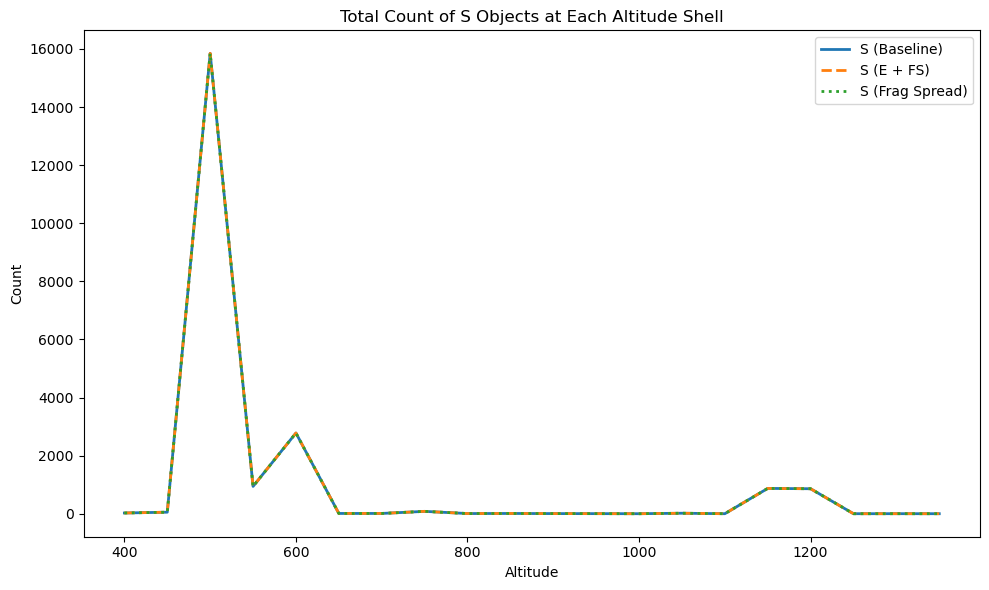

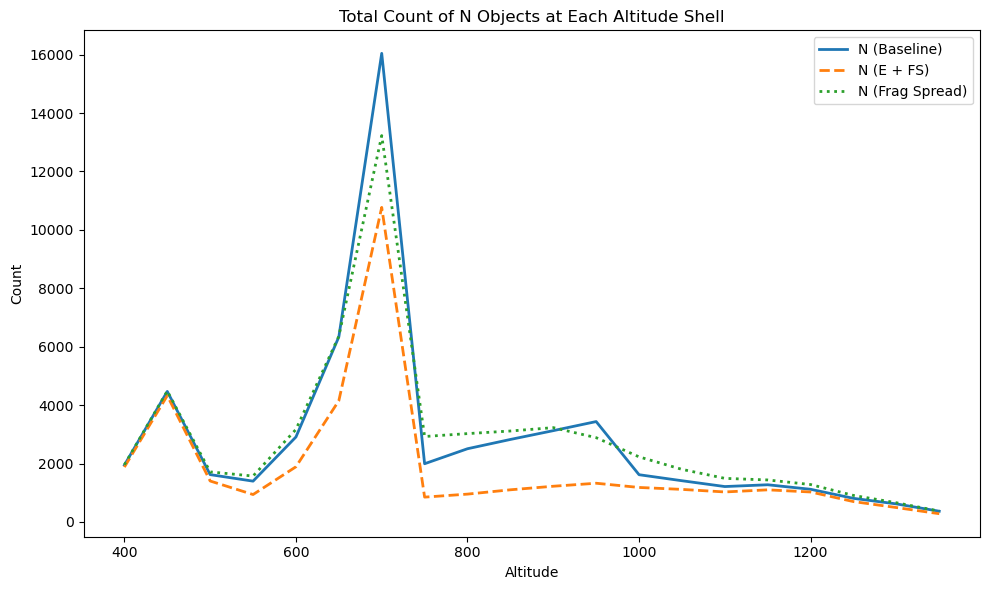

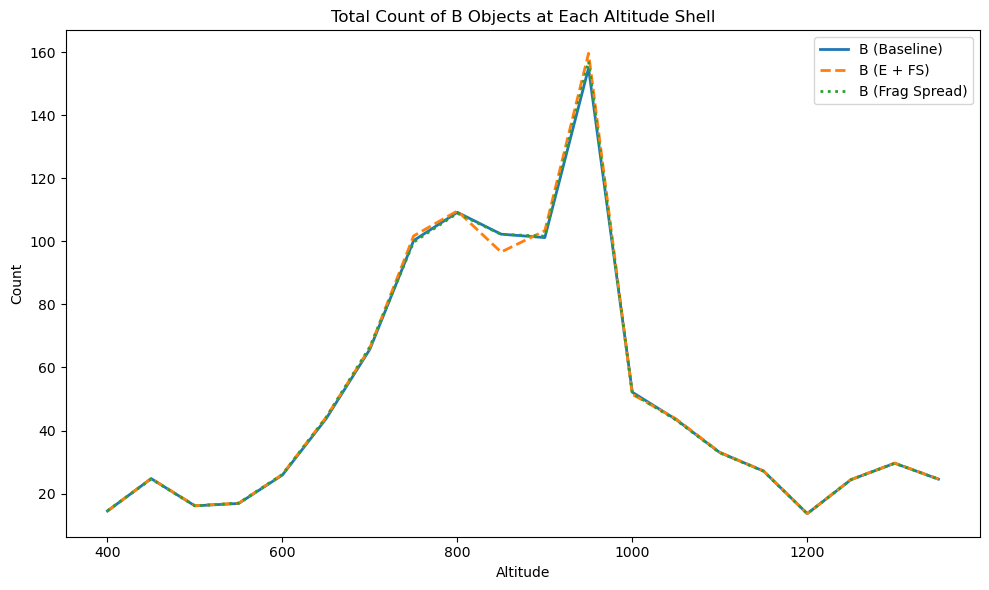

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_final_year_comparison(baseline, elliptical, frag_spread):
    # Define the final year
    final_year = 100

    # Extract the common attributes
    num_shells = baseline.n_shells
    orbital_shell_labels = baseline.R0_km[:num_shells]

    # Helper function to plot a scenario
    def accumulate_scenario_mass(scenario_properties):
        output = scenario_properties.output
        n_species = scenario_properties.species_length
        species_names = scenario_properties.species_names
        species_groups = scenario_properties.species.values()  # Get species data (to retrieve mass)

        # Initialize a dictionary to accumulate total mass for 'S', 'N', and 'B'
        species_mass_data = {
            'S': np.zeros(num_shells),
            'N': np.zeros(num_shells),
            'B': np.zeros(num_shells)
        }

        # Find the closest index for the final year
        t_idx = np.argmin(np.abs(output.t - final_year))

        # Loop over each species and accumulate mass for 'S', 'N', and 'B'
        for species_index in range(n_species):
            species_name = species_names[species_index]

            # Check if the species name starts with 'S', 'N', or 'B'
            if species_name.startswith('S'):
                group_key = 'S'
            elif species_name.startswith('N'):
                group_key = 'N'
            elif species_name.startswith('B'):
                group_key = 'B'
            else:
                continue  # Skip species that do not start with S, N, or B

            # Retrieve the mass for the current species
            # mass = 0
            # for species_group in species_groups:
            #     for species in species_group:
            #         if species.sym_name == species_names[species_index]:
            #             mass = species.mass  # Get the mass of the species
            #             break
            
            # Multiply the count by the mass to get total mass in each shell and add to the group total
            species_mass_data[group_key] += output.y.reshape(n_species, num_shells, -1)[species_index, :, t_idx] #* mass

        return species_mass_data

    # Accumulate mass for baseline, elliptical, and frag_spread
    baseline_mass = accumulate_scenario_mass(baseline)
    elliptical_mass = accumulate_scenario_mass(elliptical)
    frag_spread_mass = accumulate_scenario_mass(frag_spread)

    # Plot each group ('S', 'N', 'B') in separate figures
    groups = ['S', 'N', 'B']
    for i, group in enumerate(groups):
        plt.figure(figsize=(10, 6))
        
        # Plot for each scenario on the same plot
        plt.plot(orbital_shell_labels, baseline_mass[group], label=f'{group} (Baseline)', linestyle='-', linewidth=2)
        plt.plot(orbital_shell_labels, elliptical_mass[group], label=f'{group} (E + FS)', linestyle='--', linewidth=2)
        plt.plot(orbital_shell_labels, frag_spread_mass[group], label=f'{group} (Frag Spread)', linestyle=':', linewidth=2)
        
        # Customize the plot
        plt.title(f'Total Count of {group} Objects at Each Altitude Shell')
        plt.xlabel('Altitude')
        plt.ylabel('Count')
        plt.legend(loc='upper right')
        plt.tight_layout()
        # plt.yscale('log')

        # Show the plot for this group
        plt.show()

# Call the function with baseline, elliptical, and frag_spread
plot_final_year_comparison(baseline, elliptical, frag_spread)


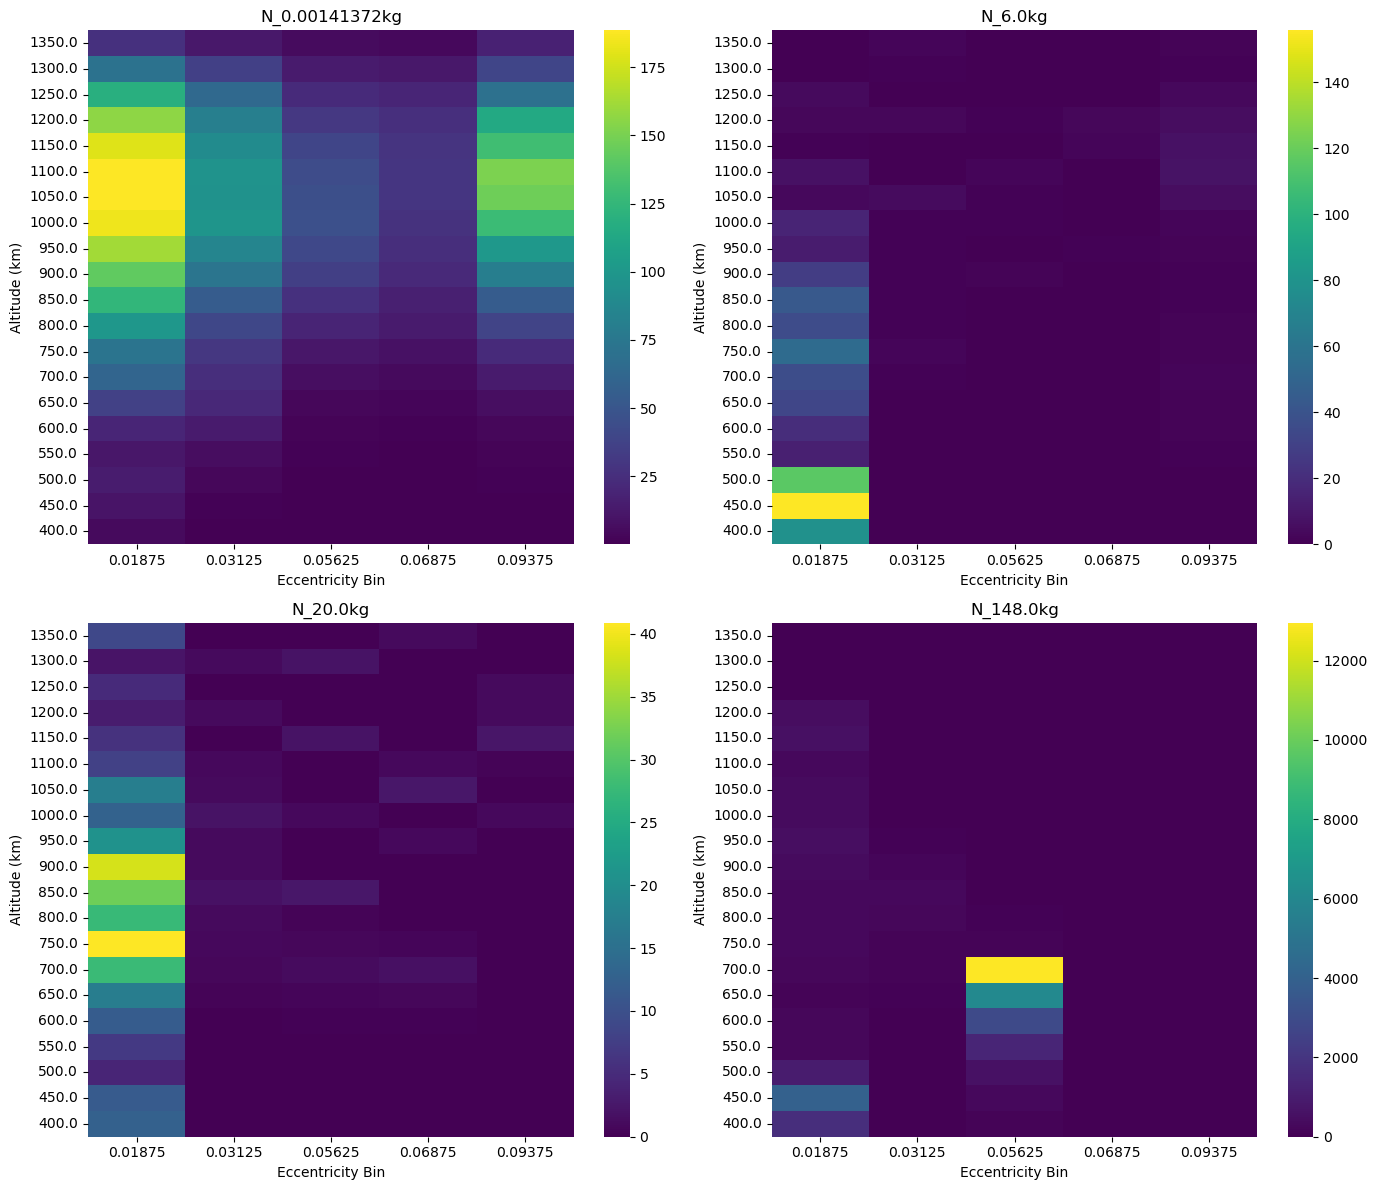

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

def create_heatmaps_for_debris(scenario_properties):
    output = scenario_properties.output
    n_species = scenario_properties.species_length
    num_shells = scenario_properties.n_shells
    species_names = scenario_properties.species_names

    # Reshape the data to separate species and shells
    data_reshaped = output.y.reshape(n_species, num_shells, -1)

    # Extract the unique base species names and elliptical values
    base_species_info = []
    for name in species_names:
        if name.startswith("N"):
            parts = name.split('_')
            if len(parts) >= 3:
                mass = float(parts[1].replace('kg', ''))
                elliptical_value = float(parts[2].replace('e', ''))  # Corrected elliptical value format
                base_species_info.append((name, mass, elliptical_value))

    # Group species by mass (we will create separate heatmaps for each mass group)
    species_by_mass = defaultdict(list)
    for species_name, mass, elliptical_value in base_species_info:
        species_by_mass[mass].append((species_name, elliptical_value))

    # Get the altitude labels
    orbital_shell_labels = scenario_properties.R0_km[:num_shells]

    # Create the 2x2 grid for heatmaps
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    axs = axs.flatten()  # Flatten the 2x2 axes array

    # Create heatmaps for each mass group
    for ax, (mass, species_info) in zip(axs, species_by_mass.items()):
        # Initialize a matrix to store counts for the heatmap (rows=altitudes, cols=elliptical values)
        elliptical_values = sorted(set(info[1] for info in species_info))
        heatmap_data = np.zeros((num_shells, len(elliptical_values)))

        # Fill the heatmap data with counts
        for species_name, elliptical_value in species_info:
            species_index = species_names.index(species_name)
            ellip_idx = elliptical_values.index(elliptical_value)
            heatmap_data[:, ellip_idx] += data_reshaped[species_index, :, -1]  # Use the final timestep

        # Create the heatmap plot in the grid
        sns.heatmap(heatmap_data, cmap='viridis', ax=ax, xticklabels=elliptical_values, yticklabels=orbital_shell_labels)
        ax.set_title(f'N_{mass}kg')
        ax.set_xlabel('Eccentricity Bin')
        ax.set_ylabel('Altitude (km)')
        ax.invert_yaxis()  # Flip y-axis so altitude increases upwards
        # set y axis ticks to be integ

    plt.tight_layout()
    plt.show()

# Call the function with the elliptical scenario
create_heatmaps_for_debris(elliptical)

In [3]:
import pandas as pd
adept = pd.read_csv(r'C:\Users\IT\Documents\UCL\pyssem\pyssem\utils\launch\data\start_full_V2_new.asem.csv')

In [ ]:
# convert datetime to pd datetime
adept['epoch_start_datetime'] = pd.to_datetime(adept['epoch_start_datetime'], errors='coerce')

print(len(adept))


